## Introduction

Paragraph

## Importing and Cleaning Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

In [2]:
#importing csv to dataframe
df = pd.read_csv('data\kc_house_data.csv')

In [3]:
#checking for duplicates 
duplicate_rows_df = df[df.duplicated()]

In [4]:
#filling the nan's with 0, all is categorical columns with the mode being 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

df.loc[df['sqft_basement'] == '?'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [5]:
#changing columns from float to int
col_floats = ['price', 'waterfront', 'view', 'yr_renovated']
for col in col_floats:
    df[col] = df[col].astype(int)

In [6]:
#expanding the date column to a column for each month and year
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year

In [7]:
#creating seasonal columns
df['sold_spring_time'] = df['month_sold'] < 4
df['sold_summer_time'] = (df['month_sold'] > 3) & (df['month_sold'] < 7)
df['sold_fall_time'] = (df['month_sold'] > 6) & (df['month_sold'] < 10)
df['sold_winter_time'] = (df['month_sold'] > 9) & (df['month_sold'] < 13)

df['sold_spring_time'] = df['sold_spring_time'].astype(bool).astype(int)
df['sold_summer_time'] = df['sold_summer_time'].astype(bool).astype(int)
df['sold_fall_time'] = df['sold_fall_time'].astype(bool).astype(int)
df['sold_winter_time'] = df['sold_winter_time'].astype(bool).astype(int)

In [8]:
#converting 'yr_renovated' and 'sqft_basement' into a boolean
df['has_renovated'] = df['yr_renovated'].astype(bool).astype(int)
df['has_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [9]:
#deleting columns not neccesary in dataframe
df.drop('date', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [10]:
# exports a clean version of raw data.
df.to_csv('data\Cleaned_kc_house_data.csv')

In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,1340,5650,10,2014,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,1690,7639,12,2014,0,0,0,1,1,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,2720,8062,2,2015,1,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,1360,5000,12,2014,0,0,0,1,0,1
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,1800,7503,2,2015,1,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21597 non-null  int32  
 1   bedrooms          21597 non-null  int64  
 2   bathrooms         21597 non-null  float64
 3   sqft_living       21597 non-null  int64  
 4   sqft_lot          21597 non-null  int64  
 5   floors            21597 non-null  float64
 6   waterfront        21597 non-null  int32  
 7   view              21597 non-null  int32  
 8   condition         21597 non-null  int64  
 9   grade             21597 non-null  int64  
 10  sqft_above        21597 non-null  int64  
 11  sqft_basement     21597 non-null  int32  
 12  yr_built          21597 non-null  int64  
 13  yr_renovated      21597 non-null  int32  
 14  zipcode           21597 non-null  int64  
 15  lat               21597 non-null  float64
 16  long              21597 non-null  float6

## EDA and Scrubbing

### price

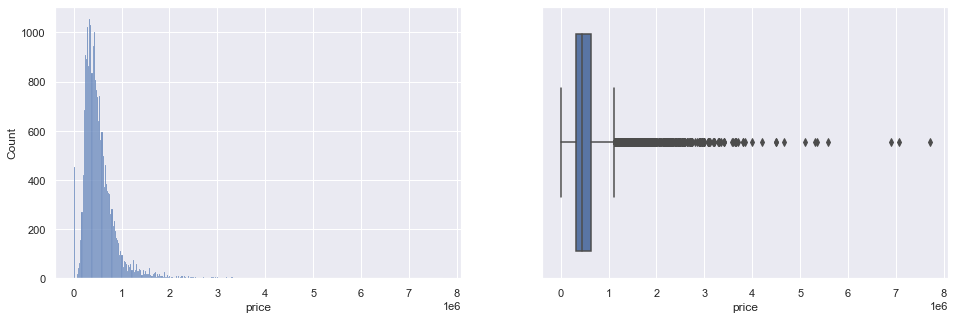

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

#looking for potential outliars
sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

In [14]:
#Making the 'price' benchmark between $100000 to $900000
df.drop(df[df['price'] > 700000].index, inplace = True)
df.drop(df[df['price'] < 150000].index, inplace = True)

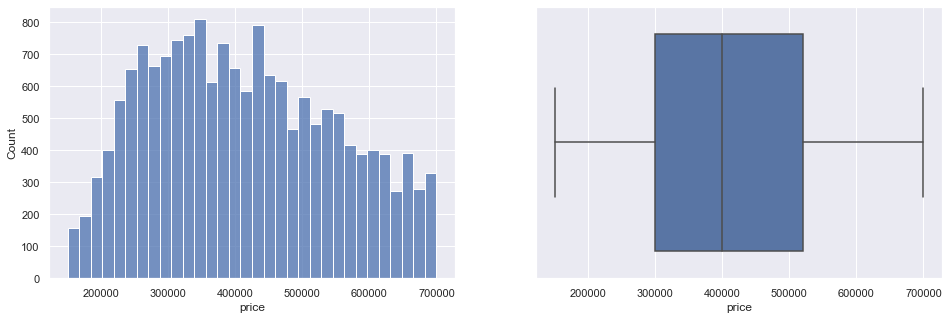

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

>The histogram and boxplot looks to be more normally distributed after removing outliers

In [16]:
#checking the rows left
df.shape

(16745, 27)

### bedrooms

In [17]:
df['bedrooms'].value_counts()

3     8399
4     4633
2     2464
5      900
1      170
6      148
7       17
8        7
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [18]:
df.drop(df[df['bedrooms'] > 6].index, inplace = True)

In [19]:
df['bedrooms'].value_counts()

3    8399
4    4633
2    2464
5     900
1     170
6     148
Name: bedrooms, dtype: int64

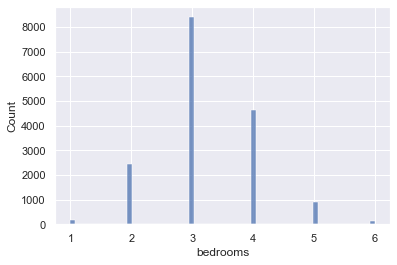

In [20]:
sns.histplot(data = df, x='bedrooms');

In [21]:
df.shape

(16714, 27)

### bathrooms

In [22]:
df['bathrooms'].value_counts()

2.50    4101
1.00    3501
1.75    2703
2.00    1682
2.25    1654
1.50    1294
2.75     723
3.00     448
3.50     252
3.25     212
0.75      62
3.75      25
4.00      19
4.50      16
1.25       7
4.25       6
5.00       3
4.75       2
0.50       2
5.25       2
Name: bathrooms, dtype: int64

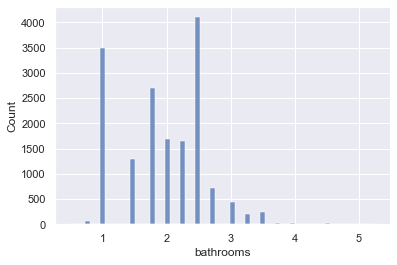

In [23]:
sns.histplot(data=df, x = 'bathrooms');

In [24]:
df.drop(df[df['bathrooms'] > 4].index, inplace = True)
df.drop(df[df['bathrooms'] < 0.75].index, inplace = True)

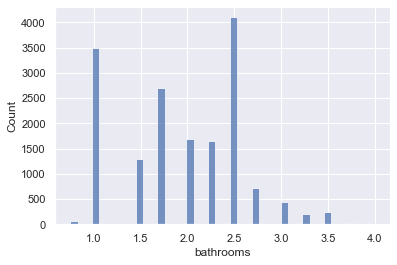

In [25]:
sns.histplot(data=df, x = 'bathrooms');

In [26]:
df.shape

(16683, 27)

### sqft_living

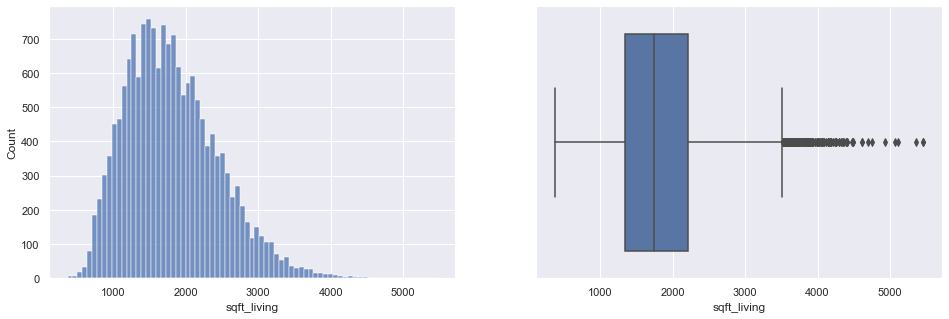

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [28]:
df.drop(df[df['sqft_living'] > 4500].index, inplace = True)

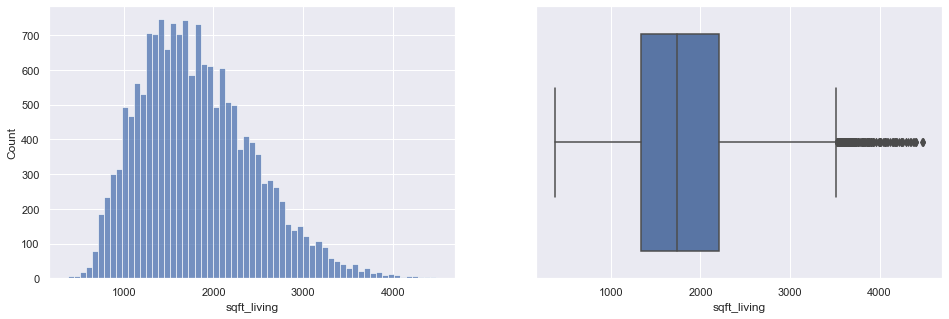

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [30]:
df.shape

(16673, 27)

### sqft_lot

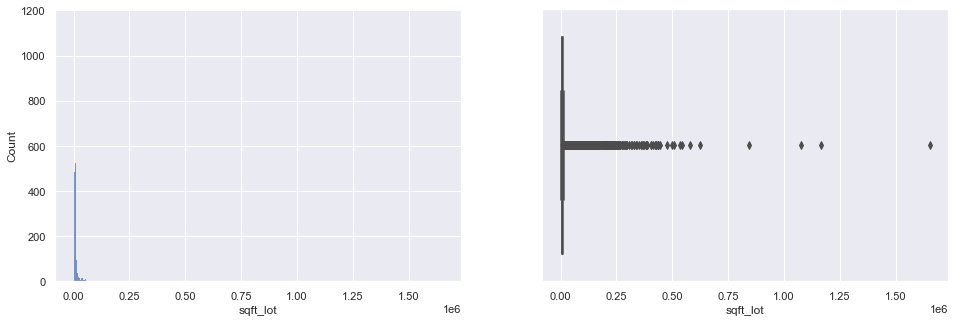

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [32]:
df.drop(df[df['sqft_lot'] > 17500].index, inplace = True)

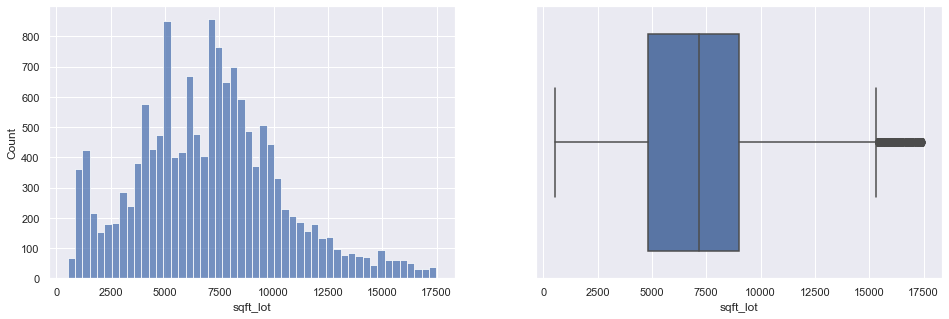

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [34]:
df.shape

(14990, 27)

### sqft_basement

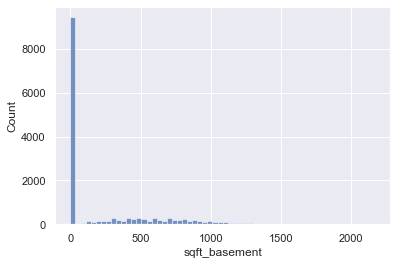

In [35]:
sns.histplot(data=df, x='sqft_basement');

In [36]:
df.drop(df[df['sqft_basement'] > 1300].index, inplace=True)

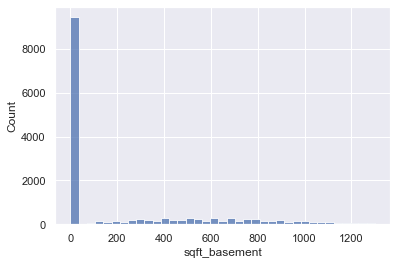

In [37]:
sns.histplot(data = df, x='sqft_basement');

#### has_basement

In [38]:
df['has_basement'].describe()

count    14838.000000
mean         0.363796
std          0.481107
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: has_basement, dtype: float64

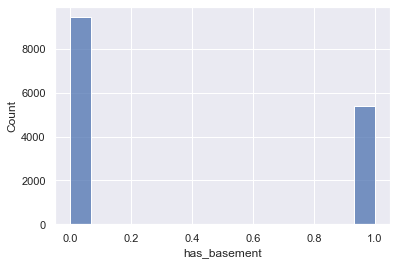

In [39]:
sns.histplot(data = df, x='has_basement');

In [40]:
df.shape

(14838, 27)

### floors

In [41]:
df['floors'].value_counts()

1.0    8122
2.0    4924
1.5    1246
3.0     482
2.5      58
3.5       6
Name: floors, dtype: int64

In [42]:
df.drop(df[df['floors'] > 3].index, inplace=True)

In [43]:
df['floors'].value_counts()

1.0    8122
2.0    4924
1.5    1246
3.0     482
2.5      58
Name: floors, dtype: int64

### grade and condition

In [44]:
df['grade'].value_counts()

7     7673
8     4218
6     1733
9      926
5      150
10     115
4       13
11       3
3        1
Name: grade, dtype: int64

In [45]:
df['condition'].value_counts()

3    9751
4    3872
5    1084
2     111
1      14
Name: condition, dtype: int64

### sqft_lot15

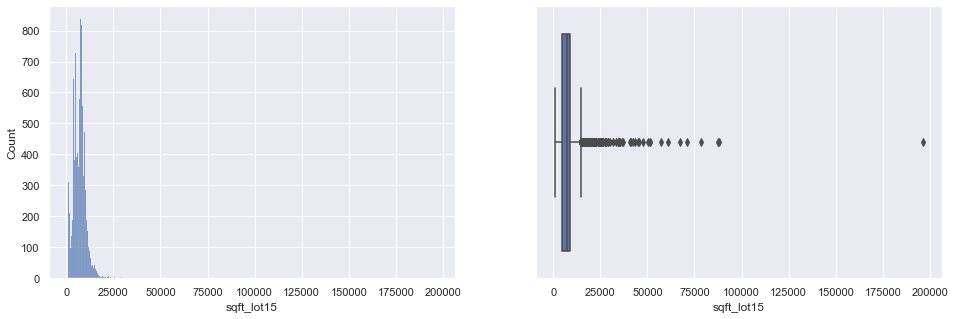

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [47]:
df.drop(df[df['sqft_lot15'] > 25000].index, inplace=True)

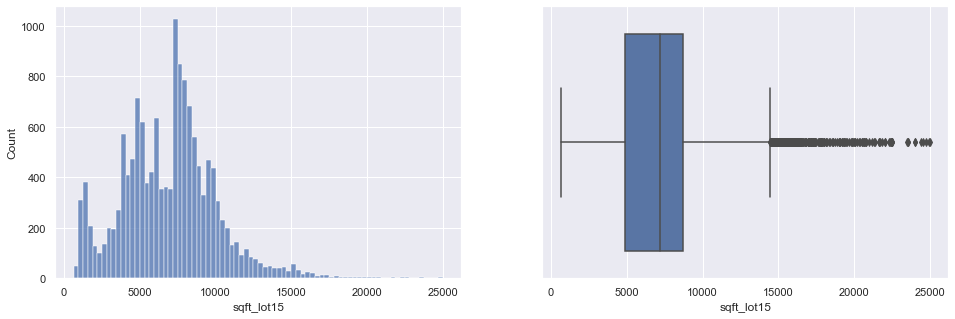

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [49]:
df.shape

(14789, 27)

### sqft_living15

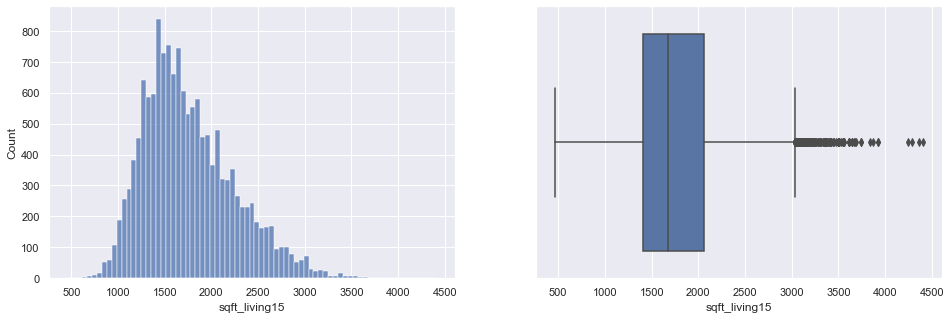

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living15', ax = ax[0])
sns.boxplot(data=df, x='sqft_living15', ax=ax[1]);

### zipcode

C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


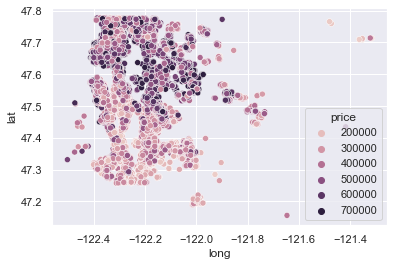

In [51]:
sns.scatterplot(df.long, df.lat, hue=df.price);

In [52]:
frequency = df.groupby('zipcode')['price'].count()
frequency

zipcode
98001    280
98002    178
98003    250
98004     27
98005     54
        ... 
98177    172
98178    226
98188    115
98198    223
98199    161
Name: price, Length: 69, dtype: int64

In [53]:
mean = df.groupby('zipcode').mean()['price']
mean

zipcode
98001    271986.396429
98002    238721.758427
98003    283515.832000
98004    632081.481481
98005    589203.166667
             ...      
98177    482602.877907
98178    289457.707965
98188    280939.695652
98198    279732.452915
98199    532290.099379
Name: price, Length: 69, dtype: float64

In [54]:
cluster = pd.concat([frequency, mean], axis=1)
cluster

,price,price
zipcode,,
98001,280,271986.396429
98002,178,238721.758427
98003,250,283515.832000
98004,27,632081.481481
98005,54,589203.166667
...,...,...
98177,172,482602.877907
98178,226,289457.707965
98188,115,280939.695652


In [55]:
cluster['zipcode'] = cluster.index

In [56]:
cluster.columns = ['frequency','price', 'zipcode']
cluster.describe()

,frequency,price,zipcode
count,69.000000,69.000000,69.000000
mean,214.333333,418886.300224,98077.855072
std,128.304288,111068.442087,56.845062
min,19.000000,238721.758427,98001.000000
25%,117.000000,311124.153846,98029.000000
50%,217.000000,419949.202346,98070.000000
75%,280.000000,510011.021687,98118.000000
max,478.000000,632081.481481,98199.000000


In [57]:
# creating "cheap" group that sell below mean price(454585)
cluster_cheap = cluster[cluster.price < 454585]

# temporary cluster of the houses that sell above mean price
cluster_temp = cluster[cluster.price >= 454585]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_cheap_low_volume = cluster_cheap[cluster_cheap.frequency < 330]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_cheap_high_volume = cluster_cheap[cluster_cheap.frequency >= 330]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 278]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 280]

In [58]:
def get_zipcode_category(zipcode):
    if zipcode in cluster_cheap_low_volume.index:
        return 'cheap_low_volume'
    elif zipcode in cluster_cheap_high_volume.index:
        return 'cheap_high_volume'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'

In [59]:
df['zipcode_type'] = df.zipcode.apply(get_zipcode_category)
df.zipcode_type.value_counts() # viewing how our clusters look
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement,zipcode_type
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,5650,10,2014,0,0,0,1,0,0,cheap_low_volume
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,7639,12,2014,0,0,0,1,1,1,cheap_high_volume
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,8062,2,2015,1,0,0,0,0,0,cheap_low_volume
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,5000,12,2014,0,0,0,1,0,1,expensive_low_volume
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,7503,2,2015,1,0,0,0,0,0,expensive_low_volume
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,1131,3.0,0,0,3,8,...,1509,5,2014,0,1,0,0,0,0,expensive_high_volume
21593,400000,4,2.50,2310,5813,2.0,0,0,3,8,...,7200,2,2015,1,0,0,0,0,0,cheap_low_volume
21594,402101,2,0.75,1020,1350,2.0,0,0,3,7,...,2007,6,2014,0,1,0,0,0,0,cheap_low_volume
21595,400000,3,2.50,1600,2388,2.0,0,0,3,8,...,1287,1,2015,1,0,0,0,0,0,expensive_low_volume


## Continuous and Categorical Features

In [60]:
# df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# df_cate = df[['condition', 'grade', 'zipcode']]

# pd.plotting.scatter_matrix(pd.concat([df_cont, df_cate], axis=1), figsize = [12,12])
# plt.show()

### Multi-collineary 

In [61]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
              'lat', 'long', 'sqft_living15', 'sqft_lot15']]

data_cont = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_cont['pairs'] = list(zip(data_cont.level_0, data_cont.level_1))
data_cont.set_index(['pairs'], inplace=True)
data_cont.drop(columns=['level_1', 'level_0'], inplace = True)
data_cont.columns = ['cc']
data_cont.drop_duplicates(inplace=True)
data_cont[(data_cont.cc>.70) & (data_cont.cc<1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.863163
"(sqft_living, sqft_above)",0.828491
"(sqft_living15, sqft_living)",0.709926


>Above table are showing some highly correlated continuous columns. We'll be dropping 'sqft_above', 'sqft_living15', and 'sqft_lot15' due to high correlation that will lead to fallacy in our model.

In [62]:
#creating seperate dataframe from the original to make changes
df_b = df

In [63]:
#dropping the multicollinearies and unwanted columns
df_b.drop('lat', axis = 1, inplace = True)
df_b.drop('long', axis = 1, inplace = True)
df_b.drop('sqft_above', axis = 1, inplace = True)
df_b.drop('sqft_living15', axis = 1, inplace = True)
df_b.drop('sqft_lot15', axis = 1, inplace = True)

> We are dropping 'lat' and 'long' columns because we'll be using zipcode instead. As well as dropping the 'view' columns because we believe it's not a big determining factor for house prices.

### Categorical / One Hot Encoded

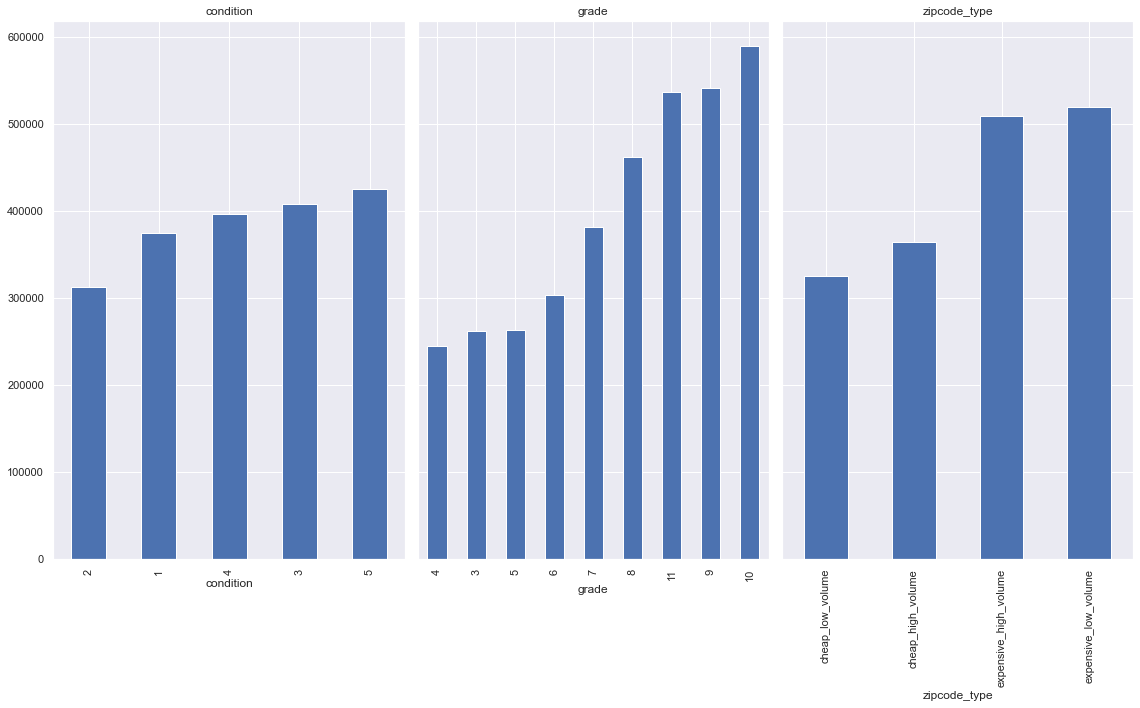

In [64]:
#looking at graphs to see columns shaped like a categorical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,10), sharey=True)

feats = ['condition', 'grade', 'zipcode_type']

for col, ax in zip(feats, axes.flatten()):
    (df.groupby(col)               
         .mean()['price']        
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)                
fig.tight_layout()

In [65]:
features = df[feats].astype('category')

In [66]:
feats_ohe = pd.get_dummies(features, drop_first = True)

In [67]:
feats_ohe = feats_ohe.astype(int)

In [68]:
feats_ohe.head()

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


### Baseline DataFrame

> Adding the new features to the baseline data

In [69]:
df_b = pd.concat([df_b, feats_ohe], axis = 1)

In [70]:
df_b.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'month_sold', 'year_sold',
       'sold_spring_time', 'sold_summer_time', 'sold_fall_time',
       'sold_winter_time', 'has_renovated', 'has_basement', 'zipcode_type',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'zipcode_type_cheap_low_volume',
       'zipcode_type_expensive_high_volume',
       'zipcode_type_expensive_low_volume'],
      dtype='object')

> dropping more unwanted columns from our baseline DataFrame

In [71]:
#dropping unwanted columns first
df_b.drop('view', axis = 1, inplace = True)
df_b.drop('yr_renovated', axis = 1, inplace = True)
df_b.drop('sqft_basement', axis = 1, inplace = True)

>Dropping 'condition', 'grade', and 'zipcode' since they're replaced with one hot encoded features

In [72]:
df_b.drop('condition', axis = 1, inplace = True)
df_b.drop('grade', axis = 1, inplace = True)
df_b.drop('zipcode', axis = 1, inplace = True)

In [73]:
df_b.drop('zipcode_type', axis = 1, inplace = True)

In [74]:
#checking to see the new dataset and ensuring that there is no missing values
df_b.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,month_sold,year_sold,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,221900,3,1.00,1180,5650,1.0,0,1955,10,2014,...,0,0,1,0,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,0,1951,12,2014,...,0,0,1,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,0,1933,2,2015,...,0,1,0,0,0,0,0,1,0,0
3,604000,4,3.00,1960,5000,1.0,0,1965,12,2014,...,0,0,1,0,0,0,0,0,0,1
4,510000,3,2.00,1680,8080,1.0,0,1987,2,2015,...,0,0,0,1,0,0,0,0,0,1


In [75]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14789 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   price                               14789 non-null  int32  
 1   bedrooms                            14789 non-null  int64  
 2   bathrooms                           14789 non-null  float64
 3   sqft_living                         14789 non-null  int64  
 4   sqft_lot                            14789 non-null  int64  
 5   floors                              14789 non-null  float64
 6   waterfront                          14789 non-null  int32  
 7   yr_built                            14789 non-null  int64  
 8   month_sold                          14789 non-null  int64  
 9   year_sold                           14789 non-null  int64  
 10  sold_spring_time                    14789 non-null  int32  
 11  sold_summer_time                    14789

## First Model - Baseline


### Train-Test Split

In [76]:
#importing the necessary libraries for train-test split
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

In [77]:
y = df_b[['price']]
X = df_b.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [78]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [79]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [80]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 80573.18
RMSE Test: 81185.41


###  model

In [81]:
from statsmodels.formula.api import ols

In [82]:
# Fitting the actual model
outcome = 'price'
dftrain = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(X.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     761.7
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:23:10   Log-Likelihood:            -1.5044e+05
No. Observations:               11831   AIC:                         3.009e+05
Df Residuals:                   11801   BIC:                         3.012e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -4.585e+07   4.89e+06     -9.383      0.000   -5.54e+07   -3.63e+07
bedrooms                           -6017.5601   1199.101     -5.018      0.000   -8367.995   -3667.125
bathrooms                           1.351e+04   1981.033      6.817      0.000    9622.445    1.74e+04
sqft_living                           75.9748      2.223     34.181      0.000      71.618      80.332
sqft_lot                              -1.4086      0.283     -4.981      0.000      -1.963      -0.854
floors                              9987.5132   2171.361      4.600      0.000    5731.288    1.42e+04
waterfront                          2.583e+05   3.09e+04      8.369      0.000    1.98e+05    3.19e+05
yr_built                           -1188.4466     40.189    -29.571      0.000   -1267.224   -1109.669
month_sold                          2586.5390   1020.217      2.535      0.011     586.745    4586.333
year_sold                           2.969e+04   3030.483      9.797      0.000    2.37e+04    3.56e+04
sold_spring_time                   -1.147e+07   1.22e+06     -9.386      0.000   -1.39e+07   -9.07e+06
sold_summer_time                   -1.145e+07   1.22e+06     -9.377      0.000   -1.38e+07   -9.06e+06
sold_fall_time                     -1.146e+07   1.22e+06     -9.385      0.000   -1.39e+07   -9.07e+06
sold_winter_time                   -1.147e+07   1.22e+06     -9.382      0.000   -1.39e+07   -9.07e+06
has_renovated                       1675.8665   5164.733      0.324      0.746   -8447.862    1.18e+04
has_basement                        1.462e+04   1836.677      7.959      0.000     1.1e+04    1.82e+04
condition_2                        -2.356e+04   2.61e+04     -0.903      0.367   -7.47e+04    2.76e+04
condition_3                         7409.7720   2.46e+04      0.301      0.763   -4.09e+04    5.57e+04
condition_4                         8771.1376   2.46e+04      0.356      0.722   -3.95e+04     5.7e+04
condition_5                         3.543e+04   2.47e+04      1.433      0.152    -1.3e+04    8.39e+04
grade_4                             2615.6483   8.47e+04      0.031      0.975   -1.63e+05    1.69e+05
grade_5                            -5.338e+04   8.11e+04     -0.658      0.511   -2.12e+05    1.06e+05
grade_6                            -1.184e+04   8.08e+04     -0.146      0.884    -1.7e+05    1.47e+05
grade_7                              3.18e+04   8.08e+04      0.394      0.694   -1.27e+05     1.9e+05
grade_8                             7.961e+04   8.09e+04      0.985      0.325   -7.89e+04    2.38e+05
grade_9                             1.413e+05   8.09e+04      1.746      0.081   -1.73e+04       3e+05
grade_10                            1.505e+05   8.13e+04      1.851      0.064   -8895.397     3

R-squared: 0.826

Adj R-squared: 0.825

Number of significant p_values: 13

### Checking QQ Plot

In [83]:
import statsmodels.api as sm

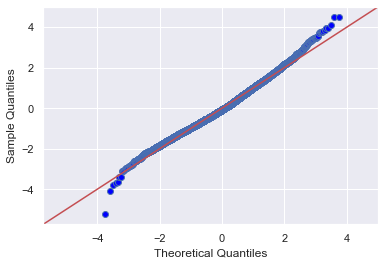

In [84]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for Homoscedasticity

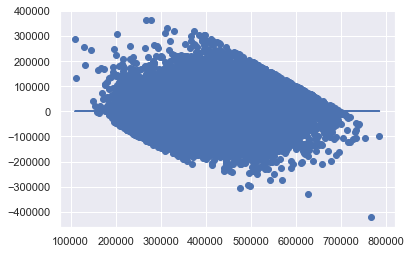

In [85]:
plt.scatter(model.predict(dftrain[X.columns]), model.resid)
plt.plot(model.predict(dftrain[X.columns]), [0 for i in range(len(dftrain))])

## Second Model - Multicollinearies

### checking and fixing multicollinearies

In [86]:
#Importing variance inflation factor to check for multicollinearies 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
col = df_b[X.columns]
vif = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
list(zip(X.columns, vif))

[('bedrooms', 1.7713804042657382),
 ('bathrooms', 3.0133194562930954),
 ('sqft_living', 3.1570424160615316),
 ('sqft_lot', 1.599781817973766),
 ('floors', 2.515886536275822),
 ('waterfront', 1.0164315745817336),
 ('yr_built', 2.5102850249888373),
 ('month_sold', 18.622713855921187),
 ('year_sold', 3.6429867955724293),
 ('sold_spring_time', 13031555.876015928),
 ('sold_summer_time', 20833682.800567977),
 ('sold_fall_time', 18483205.840047117),
 ('sold_winter_time', 15036587.287140993),
 ('has_renovated', 1.0774084383836473),
 ('has_basement', 1.4079339864458),
 ('condition_2', 8.80107089126227),
 ('condition_3', 241.64161202837937),
 ('condition_4', 206.889138560819),
 ('condition_5', 73.38214493190468),
 ('grade_4', 14.008864689027273),
 ('grade_5', 148.77765637759128),
 ('grade_6', 1530.12880165147),
 ('grade_7', 3703.1764947022975),
 ('grade_8', 3021.6052208900023),
 ('grade_9', 870.5525866911091),
 ('grade_10', 115.58257473337584),
 ('grade_11', 4.014928749241209),
 ('zipcode_type_c

In [88]:
vif_scores = list(zip(X.columns, vif))
v_test = [x for x, vif in vif_scores if vif > 10]
print(len(vif_scores), len(v_test))

30 15


In [89]:
v_test

['month_sold',
 'sold_spring_time',
 'sold_summer_time',
 'sold_fall_time',
 'sold_winter_time',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10']

In [90]:
for v in v_test:
    dftrain.drop(v, axis=1, inplace=True)

In [91]:
dftrain.drop('condition_2', axis = 1, inplace = True)

In [92]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11831 entries, 13460 to 5289
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   bedrooms                            11831 non-null  int64  
 1   bathrooms                           11831 non-null  float64
 2   sqft_living                         11831 non-null  int64  
 3   sqft_lot                            11831 non-null  int64  
 4   floors                              11831 non-null  float64
 5   waterfront                          11831 non-null  int32  
 6   yr_built                            11831 non-null  int64  
 7   year_sold                           11831 non-null  int64  
 8   has_renovated                       11831 non-null  int32  
 9   has_basement                        11831 non-null  int32  
 10  grade_11                            11831 non-null  int32  
 11  zipcode_type_cheap_low_volume       11

### Train-Test Split

In [93]:
y = dftrain[['price']]
X = dftrain.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [94]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [95]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [96]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 85587.91
RMSE Test: 85845.05


### model

In [97]:
updf_b = dftrain.drop(['price'], axis=1)
predictors = '+'.join(updf_b.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     1303.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:23:12   Log-Likelihood:            -1.5116e+05
No. Observations:               11831   AIC:                         3.023e+05
Df Residuals:                   11816   BIC:                         3.025e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -2.921e+07   3.39e+06     -8.616      0.000   -3.59e+07   -2.26e+07
bedrooms                           -1.105e+04   1251.745     -8.825      0.000   -1.35e+04   -8592.814
bathrooms                           1.798e+04   2080.000      8.643      0.000    1.39e+04    2.21e+04
sqft_living                          107.9767      2.151     50.193      0.000     103.760     112.193
sqft_lot                              -1.0327      0.298     -3.465      0.001      -1.617      -0.448
floors                              1.688e+04   2271.710      7.432      0.000    1.24e+04    2.13e+04
waterfront                          2.427e+05   3.25e+04      7.470      0.000    1.79e+05    3.06e+05
yr_built                            -846.2638     38.911    -21.749      0.000    -922.535    -769.992
year_sold                           1.541e+04   1683.258      9.152      0.000    1.21e+04    1.87e+04
has_renovated                       1293.8384   5439.482      0.238      0.812   -9368.443     1.2e+04
has_basement                        1.202e+04   1929.573      6.229      0.000    8237.852    1.58e+04
grade_11                           -2.631e+04   6.07e+04     -0.434      0.665   -1.45e+05    9.26e+04
zipcode_type_cheap_low_volume      -3.461e+04   1973.058    -17.542      0.000   -3.85e+04   -3.07e+04
zipcode_type_expensive_high_volume  1.483e+05   2946.111     50.327      0.000    1.42e+05    1.54e+05
zipcode_type_expensive_low_volume   1.462e+05   2188.840     66.778      0.000    1.42e+05     1.5e+05
==============================================================================
Omnibus:                      228.306   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.382
Skew:                           0.330   Prob(JB):                     8.57e-54
Kurtosis:                       3.244   Cond. No.                     3.59e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ Plot

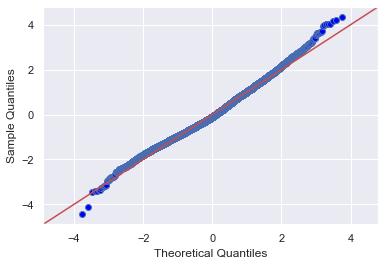

In [98]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasticity

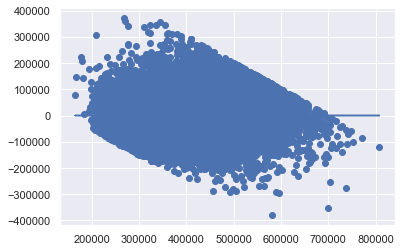

In [99]:
plt.scatter(model.predict(dftrain[updf_b.columns]), model.resid)
plt.plot(model.predict(dftrain[updf_b.columns]), [0 for i in range(len(dftrain))]);

## Third Model - P_Values

### finding and fixing high p_values

In [100]:
# finding the high p values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)

In [101]:
#showing the high p values
high_p_values = list(p_table[p_table['P>|t|'] >= 0.05].index)
print("Our high p_values columns:", high_p_values)

Our high p_values columns: ['has_renovated', 'grade_11']


In [102]:
# leaving the high p values out.
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

### Train-Test Split

In [103]:
y = dftrain[['price']]
X = dftrain[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [104]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [105]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [106]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 85596.69
RMSE Test: 85785.67


### model

In [107]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     1520.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:23:13   Log-Likelihood:            -1.5116e+05
No. Observations:               11831   AIC:                         3.023e+05
Df Residuals:                   11818   BIC:                         3.024e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -2.917e+07   3.39e+06     -8.607      0.000   -3.58e+07   -2.25e+07
bedrooms                           -1.105e+04   1250.748     -8.837      0.000   -1.35e+04   -8600.626
bathrooms                           1.803e+04   2071.578      8.701      0.000     1.4e+04    2.21e+04
sqft_living                          107.9502      2.149     50.222      0.000     103.737     112.163
sqft_lot                              -1.0342      0.298     -3.471      0.001      -1.618      -0.450
floors                               1.69e+04   2269.382      7.449      0.000    1.25e+04    2.14e+04
waterfront                          2.431e+05   3.25e+04      7.486      0.000    1.79e+05    3.07e+05
yr_built                            -848.2472     37.933    -22.362      0.000    -922.601    -773.893
year_sold                           1.539e+04   1682.615      9.144      0.000    1.21e+04    1.87e+04
has_basement                        1.202e+04   1928.061      6.232      0.000    8236.411    1.58e+04
zipcode_type_cheap_low_volume      -3.461e+04   1972.719    -17.543      0.000   -3.85e+04   -3.07e+04
zipcode_type_expensive_high_volume  1.482e+05   2944.358     50.348      0.000    1.42e+05    1.54e+05
zipcode_type_expensive_low_volume   1.462e+05   2188.650     66.785      0.000    1.42e+05     1.5e+05
==============================================================================
Omnibus:                      228.524   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.625
Skew:                           0.330   Prob(JB):                     7.59e-54
Kurtosis:                       3.244   Cond. No.                     3.59e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ plot

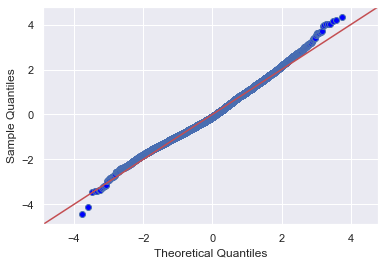

In [108]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasiticity

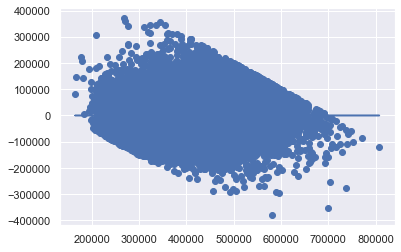

In [109]:
plt.scatter(model.predict(dftrain[x_cols]), model.resid)
plt.plot(model.predict(dftrain[x_cols]), [0 for i in range(len(dftrain))]);

## Fourth Model  - Transformation

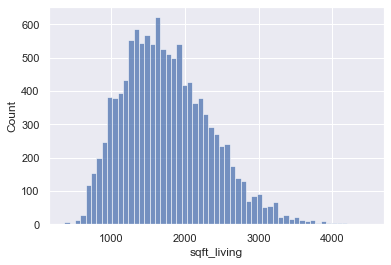

In [110]:
cont = ['sqft_living','sqft_lot']

sns.histplot(data = dftrain, x = 'sqft_living');

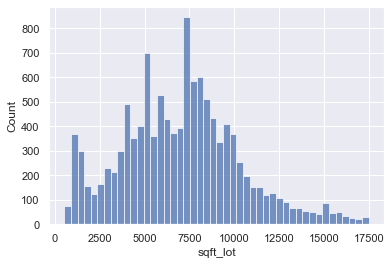

In [111]:
sns.histplot(data = dftrain, x = 'sqft_lot');

In [112]:
dfcont = dftrain[cont]
log_names = [f'{column}_log' for column in dfcont.columns]

df_log = np.log(dfcont)
df_log.columns = log_names

for col in df_log:
    dftrain[col] = df_log[col]

In [113]:
dftrain

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,year_sold,has_renovated,has_basement,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume,price,sqft_living_log,sqft_lot_log
13460,2,1.00,1000,3700,1.0,0,1929,2015,0,1,0,0,0,0,257000,6.907755,8.216088
7880,5,2.00,2610,5009,1.0,0,1988,2014,0,1,0,0,1,0,439000,7.867106,8.518992
37,4,2.00,2360,6000,2.0,0,1904,2014,0,0,0,0,0,1,640000,7.766417,8.699515
15457,2,1.00,980,2130,1.0,0,1918,2014,0,1,0,0,1,0,400000,6.887553,7.663877
3905,4,2.25,2270,9100,2.0,0,1978,2015,0,0,0,0,0,0,420000,7.727535,9.116030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,3,1.75,2010,8072,1.0,0,1974,2015,0,0,0,0,1,0,639500,7.605890,8.996157
17970,1,0.75,930,6600,1.0,0,1924,2015,0,0,0,0,0,0,351000,6.835185,8.794825
1950,3,2.00,1370,9760,1.0,0,1979,2015,0,1,0,0,0,0,232500,7.222566,9.186048
17077,2,1.00,860,7250,1.0,0,1949,2014,0,0,0,0,0,0,305000,6.756932,8.888757


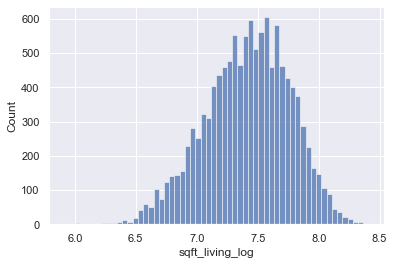

In [114]:
sns.histplot(data = dftrain, x = 'sqft_living_log');

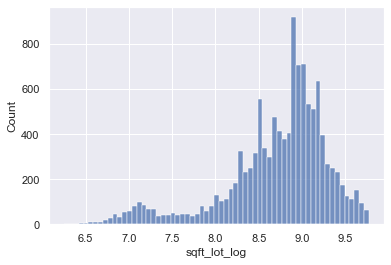

In [115]:
sns.histplot(data = dftrain, x = 'sqft_lot_log');

In [116]:
x_cols.remove('sqft_living')
# x_cols.remove('sqft_lot')

x_cols.append('sqft_living_log')
# x_cols.append('sqft_lot_log')

### Train-Test Split

In [117]:
y = dftrain[['price']]
X = dftrain[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [118]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [119]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [120]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 86389.28
RMSE Test: 86789.63


In [121]:
#test>train....overfit

### model

In [122]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1472.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:23:15   Log-Likelihood:            -1.5127e+05
No. Observations:               11831   AIC:                         3.026e+05
Df Residuals:                   11818   BIC:                         3.027e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -3.071e+07   3.42e+06     -8.975      0.000   -3.74e+07    -2.4e+07
bedrooms                           -1.224e+04   1284.930     -9.524      0.000   -1.48e+04   -9718.947
bathrooms                           1.806e+04   2109.391      8.560      0.000    1.39e+04    2.22e+04
sqft_lot                              -1.0397      0.302     -3.440      0.001      -1.632      -0.447
floors                              1.682e+04   2295.561      7.326      0.000    1.23e+04    2.13e+04
waterfront                          2.433e+05   3.28e+04      7.421      0.000    1.79e+05    3.08e+05
yr_built                            -885.7932     38.310    -23.122      0.000    -960.887    -810.700
year_sold                           1.561e+04   1699.077      9.185      0.000    1.23e+04    1.89e+04
has_basement                        6633.7056   1975.928      3.357      0.001    2760.561    1.05e+04
zipcode_type_cheap_low_volume      -3.507e+04   1991.756    -17.606      0.000    -3.9e+04   -3.12e+04
zipcode_type_expensive_high_volume  1.468e+05   2972.748     49.387      0.000    1.41e+05    1.53e+05
zipcode_type_expensive_low_volume   1.453e+05   2210.333     65.741      0.000    1.41e+05     1.5e+05
sqft_living_log                     1.851e+05   3906.334     47.394      0.000    1.77e+05    1.93e+05
==============================================================================
Omnibus:                      230.744   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.112
Skew:                           0.339   Prob(JB):                     5.95e-54
Kurtosis:                       3.191   Cond. No.                     3.52e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ Plot

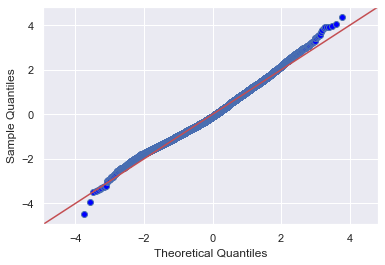

In [123]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

###  Homoscedasiticity

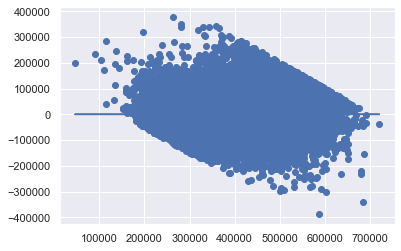

In [124]:
plt.scatter(model.predict(dftrain[x_cols]), model.resid)
plt.plot(model.predict(dftrain[x_cols]), [0 for i in range(len(dftrain))]);